In [1]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
from agents import *
import numpy as np
from tqdm.notebook import tqdm

In [19]:
# train david's agent
david_agent = DavidAgent(env_name='CartPole-v1')
history = david_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_david.pth')

Episode: 100 | score: 25.342824719756987
Episode: 200 | score: 25.602414085853912
Episode: 300 | score: 39.055514355553775
Episode: 400 | score: 27.953253311829226
Episode: 500 | score: 44.629990590351085
Episode: 600 | score: 78.17693689423405
Episode: 700 | score: 105.01806445116085
Episode: 800 | score: 145.65620009794114
Episode: 900 | score: 272.83052789808016
Episode: 1000 | score: 331.1357090151908
Episode: 1100 | score: 363.1338943614998
Episode: 1200 | score: 436.6641794959015
Episode: 1300 | score: 406.93974208845026
Episode: 1400 | score: 435.1002839433381
Episode: 1500 | score: 467.07003047459943
Episode: 1600 | score: 488.4111507708074
Episode: 1700 | score: 442.32089517259226
Episode: 1800 | score: 458.3923465399434
Episode: 1900 | score: 482.8019337922032
Episode: 2000 | score: 496.96057666496057


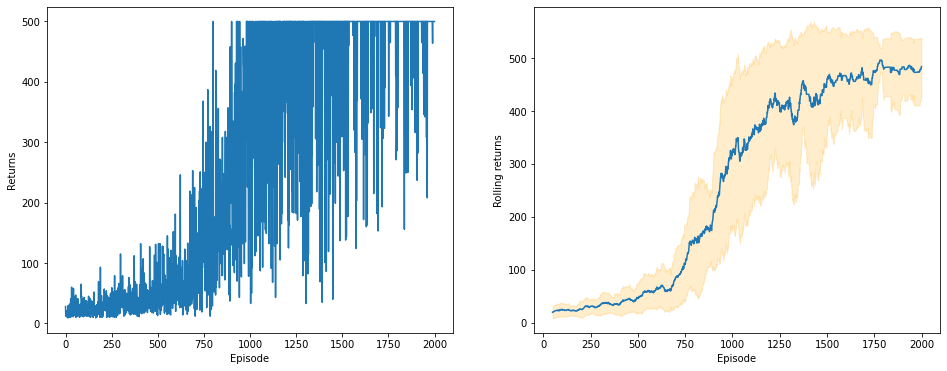

In [20]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

In [21]:
# train sutton's agent
sutton_agent = SuttonAgent(env_name='CartPole-v1')
history = sutton_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_sutton.pth')

Episode: 100 | score: 51.864558536933565
Episode: 200 | score: 343.3243238491265
Episode: 300 | score: 427.9694714111452
Episode: 400 | score: 493.3734592996437
Episode: 500 | score: 388.0114293445003
Episode: 600 | score: 480.57297813573587
Episode: 700 | score: 336.2294645040263
Episode: 800 | score: 499.9881652423359
Episode: 900 | score: 398.7037227626224
Episode: 1000 | score: 488.1795201051043
Episode: 1100 | score: 478.6880886931158
Episode: 1200 | score: 406.80817150005856
Episode: 1300 | score: 301.4742014513267
Episode: 1400 | score: 426.3222422662101
Episode: 1500 | score: 462.6393848899136
Episode: 1600 | score: 420.1443400611748
Episode: 1700 | score: 495.57807990964767
Episode: 1800 | score: 430.70294811670215
Episode: 1900 | score: 479.51577678682355
Episode: 2000 | score: 464.41375006633


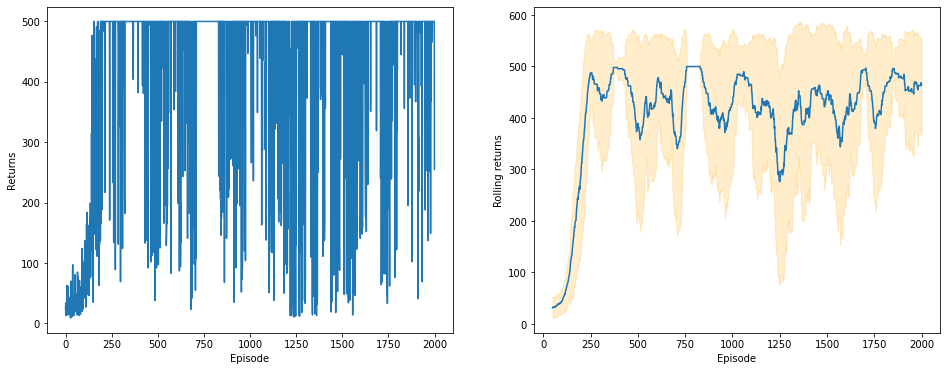

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

In [23]:
# train sutton's agent importance weighted
sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
history = sutton_agent_imp_weighted.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_sutton.pth')

Episode: 100 | score: 56.08660377358397
Episode: 200 | score: 348.2255463491671
Episode: 300 | score: 301.4093608519018
Episode: 400 | score: 397.81799193758957
Episode: 500 | score: 498.2600520355577
Episode: 600 | score: 499.69990324181083
Episode: 700 | score: 499.9999920290104
Episode: 800 | score: 132.23070953310625
Episode: 900 | score: 384.0338481339304
Episode: 1000 | score: 499.2086451487099
Episode: 1100 | score: 146.08432581403684
Episode: 1200 | score: 125.36982757965541
Episode: 1300 | score: 155.85092310314985
Episode: 1400 | score: 128.24467404082634
Episode: 1500 | score: 128.21254833122697
Episode: 1600 | score: 130.59800098928065
Episode: 1700 | score: 139.93042733458927
Episode: 1800 | score: 148.98138959426103
Episode: 1900 | score: 198.6179190773911
Episode: 2000 | score: 220.24092537903476


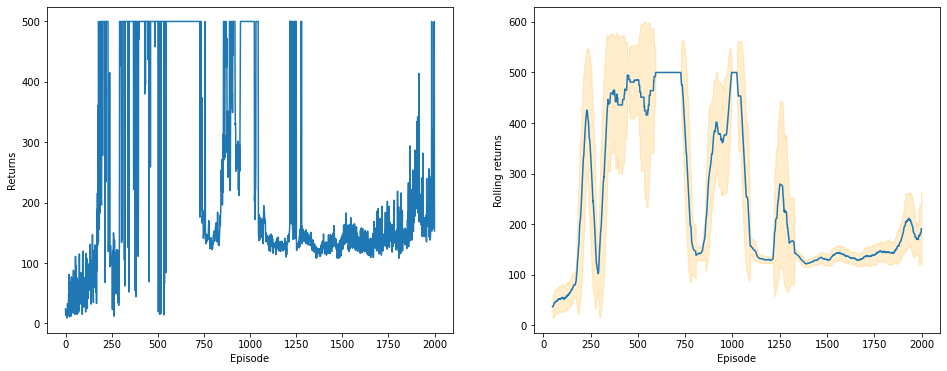

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

## Simulating the learning N times

In [2]:
N = 20
returns = {
    'david': [],
    'sutton': [],
    'sutton_imp_weighted': []
}
for trial in tqdm(range(N)):
    david_agent = DavidAgent(env_name='CartPole-v1')
    history = david_agent.update_policy(
        max_episodes=2000,
        save=False,
        logging=False,
        save_pth='')
    returns['david'].append(np.cumsum(history))
    
    sutton_agent = SuttonAgent(env_name='CartPole-v1')
    history = sutton_agent.update_policy(
        max_episodes=2000,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton'].append(np.cumsum(history))
    
    sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
    history = sutton_agent_imp_weighted.update_policy(
        max_episodes=2000,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton_imp_weighted'].append(np.cumsum(history))

  0%|          | 0/20 [00:00<?, ?it/s]

In [29]:
means = {k: np.mean(returns[k], axis=0) for k in returns}
stds = {k: np.std(returns[k], axis=0) for k in returns}

non_cum_returns = {}
for agent, agent_returns in returns.items():
    non_cum_returns[agent] = []
    for agent_return in agent_returns:
        tmp = []
        for i in range(len(agent_return)-1, 0, -1):
            tmp.insert(0, agent_return[i] - agent_return[i-1])
        tmp.insert(0, agent_return[0])
        non_cum_returns[agent].append(tmp)
non_cum_means = {k: np.mean(non_cum_returns[k], axis=0) for k in non_cum_returns}
non_cum_stds = {k: np.std(non_cum_returns[k], axis=0) for k in non_cum_returns}

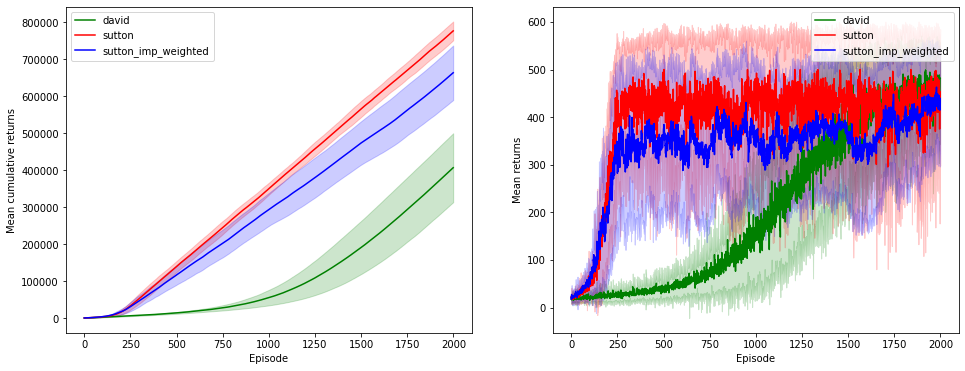

In [30]:
colors = ['g', 'r', 'b']
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for i, k in enumerate(returns):
    plt.plot(range(len(means[k])), means[k], color=colors[i], label=k)
    plt.fill_between(range(len(means[k])),means[k]-stds[k], means[k]+stds[k], color=colors[i], alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Mean cumulative returns')
plt.legend()

plt.subplot(1, 2, 2)
for i, k in enumerate(non_cum_returns):
    plt.plot(range(len(means[k])), non_cum_means[k], color=colors[i], label=k)
    plt.fill_between(range(len(non_cum_means[k])),non_cum_means[k]-non_cum_stds[k], non_cum_means[k]+non_cum_stds[k], color=colors[i], alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Mean returns')
plt.legend()


plt.show()

Observations:
1. All three models learn equally well but at very different rates leading to the different mean cumulative returns trajectory. 
2. The low standard deviation of sutton's agent means that it learns equally well everytime it is put to learn in a new cartpole evironment. 
3. In addition to that, all the agents have attained constant slope by episode 2000 meaning that they are generating their maximum returns by then and we don't need to run the simulations for longer.
4. Standard deviations of the three agents don't intersect implying that sutton's agent is significantly better than both the other agents

Things I don't understand right now:
1. One thing I found peculiar is that standardizing the rewards does wonders for David's version of the REINFORCE but when I standardize the rewards for Sutton's agent, the policy gradients explode leading to nan weights :/
2. I haven't tried changing the policy architecture, so will try different architectures as well
3. SGD sucks compared to Adam for all three algorithms (tried a whole lot of different learning rates). With SGD, David's agent learns best.